Dengue AI Project
---
Philippines: Region 10

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

Import dataset.
---
*   Independent variables = Humidity, Rainfall, Temperature.
*   Dependent variable = Dengue count

In [2]:
Philippines = pd.read_csv('dengue_climate.csv')
Region = Philippines['Region']
Year = Philippines['Year']
Month = Philippines['Month']
climate = ['Humidity', 'Rainfall', 'Temperature']


Log transformation
---



In [3]:
Humidity = np.log(Philippines.Humidity +1)
Rainfall = np.log(Philippines.Rainfall +1)
Temperature = np.log(Philippines.Temperature +1)
Dengue_Count = np.log(Philippines.Dengue_Count +1)

In [4]:
Humidity = pd.DataFrame(Humidity, columns=['Humidity'])
Rainfall = pd.DataFrame(Rainfall, columns=['Rainfall'])
Temperature = pd.DataFrame(Temperature, columns=['Temperature'])
Dengue_Count = pd.DataFrame(Dengue_Count, columns=['Dengue_Count'])
Philippines = Humidity.join(Rainfall.join(Temperature.join(Dengue_Count)))
Philippines = pd.concat([Region, Year, Month, Philippines], axis=1)

Create training and test set
---
* Training set = Year 2013 to 2017
* Test set = Year 2018


In [5]:
R10_trainset = Philippines[(Philippines['Year'] < 2018) & (Philippines['Region'] == 'Region10')]
R10_train_climate = R10_trainset.loc[:, climate].values
R10_train_dengue = R10_trainset.iloc[:, -1].values
R10_testset = Philippines[(Philippines['Year'] == 2018) & (Philippines['Region'] == 'Region10')]
R10_test_climate = R10_testset.loc[:, climate].values
R10_test_dengue = R10_testset.iloc[:, -1].values

Create artificial neural network.
---


In [6]:
R10ann = tf.keras.models.Sequential()
R10ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
R10ann.add(tf.keras.layers.Dense(units=1))
R10ann.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')
R10ann.fit(R10_train_climate, R10_train_dengue, batch_size = 48, epochs = 500)

Train on 60 samples
Epoch 1/500
60/60 [==============================] - 1s 21ms/sample - loss: 3.3206
Epoch 2/500
60/60 [==============================] - 0s 107us/sample - loss: 3.2297
Epoch 3/500
60/60 [==============================] - 0s 129us/sample - loss: 3.1405
Epoch 4/500
60/60 [==============================] - 0s 129us/sample - loss: 3.0518
Epoch 5/500
60/60 [==============================] - 0s 127us/sample - loss: 2.9644
Epoch 6/500
60/60 [==============================] - 0s 110us/sample - loss: 2.8736
Epoch 7/500
60/60 [==============================] - 0s 123us/sample - loss: 2.7752
Epoch 8/500
60/60 [==============================] - 0s 123us/sample - loss: 2.6768
Epoch 9/500
60/60 [==============================] - 0s 107us/sample - loss: 2.5977
Epoch 10/500
60/60 [==============================] - 0s 129us/sample - loss: 2.5308
Epoch 11/500
60/60 [==============================] - 0s 102us/sample - loss: 2.4648
Epoch 12/500
60/60 [==============================] - 0

Predict dengue using the test set
---

In [7]:
predict_R10_dengue = R10ann.predict(R10_test_climate)


Get the Mean Squared Logarithmic Error
---



In [8]:
msle = tf.keras.losses.MeanSquaredLogarithmicError()
R10_msle = msle(R10_test_dengue, predict_R10_dengue).numpy()

Compare the predicted from the actual values of dengue incidence
---

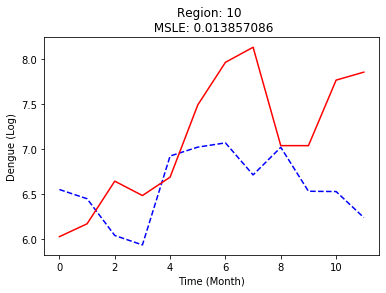

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.set_title('Region: 10 \n MSLE: '+str(R10_msle))
ax.set_ylabel('Dengue (Log)')
ax.set_xlabel('Time (Month)')
plt.plot(predict_R10_dengue, 'b--')
plt.plot(R10_test_dengue, 'r-')
plt.show()

In [11]:
predict = pd.DataFrame(predict_R10_dengue)
actual = pd.DataFrame(R10_test_dengue)
R10_eval = pd.concat([predict, actual], axis=1)
R10_eval.columns = ['Predict', 'Actual']
R10_eval.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
R10_eval.to_csv('R10_eval.csv')